In [ ]:
# SDSS DR16

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.cosmology import WMAP9 as cosmo

In [36]:
md = np.genfromtxt('GU2_TP_MaNGA.csv', dtype='str', delimiter=',')
print(md[0])
mdtype = [((md[0][i]), '<f8') for i in range(len(md[0]))]
mdata0 = np.genfromtxt('GU2_TP_MaNGA.csv', dtype=mdtype, delimiter=',', skip_header=1)

sd = np.genfromtxt('GU2_TP_SDSS.csv', dtype='str', delimiter=',')
print(sd[0])
sdtype = [((sd[0][i]), '<f8') for i in range(len(sd[0]))]
sdata0 = np.genfromtxt('GU2_TP_SDSS.csv', dtype=sdtype, delimiter=',', skip_header=1)

['mangaid' 'objra' 'objdec' 'z' 'emline_sflux_cen_oiii_5008'
 'emline_sflux_1re_oiii_5008' 'emline_sflux_tot_oiii_5008'
 'emline_sflux_cen_nii_6549' 'emline_sflux_1re_nii_6549'
 'emline_sflux_tot_nii_6549' 'emline_sflux_cen_sii_6718'
 'emline_sflux_1re_sii_6718' 'emline_sflux_tot_sii_6718'
 'emline_sflux_cen_sii_6732' 'emline_sflux_1re_sii_6732'
 'emline_sflux_tot_sii_6732' 'emline_sflux_cen_oi_6302'
 'emline_sflux_1re_oi_6302' 'emline_sflux_tot_oi_6302'
 'emline_sflux_cen_ha_6564' 'emline_sflux_1re_ha_6564'
 'emline_sflux_tot_ha_6564' 'emline_sflux_cen_hb_4862'
 'emline_sflux_1re_hb_4862' 'emline_sflux_tot_hb_4862'
 'emline_sflux_cen_hdel_4102' 'emline_sflux_1re_hdel_4102'
 'emline_sflux_tot_hdel_4102']
['specObjID' 'ra' 'dec' 'z' 'zErr' 'petroMag_g' 'petroMag_r'
 'extinction_g' 'extinction_r' 'fracDev_r' 'petroR50_r' 'petroR50Err_r'
 'petroR90_r' 'logMass' 'oiii_5007_cont' 'oiii_5007_cont_err'
 'oiii_5007_eqw' 'oiii_5007_eqw_err' 'oiii_5007_flux' 'oiii_5007_flux_err'
 'nii_6548_cont'

In [105]:
# Cutting
mcri0 = mdata0['objra'] > 0
mcri1 = mdata0['z'] > 0
mcri_ha = np.isnan(mdata0['emline_sflux_cen_ha_6564'])
mcri_hb = np.isnan(mdata0['emline_sflux_cen_hb_4862'])
mcri_ha0 = np.where(mdata0['emline_sflux_cen_ha_6564'] == 0)[0]
mcri_hb0 = np.where(mdata0['emline_sflux_cen_hb_4862'] == 0)[0]
mcri_0 = np.array([True] * len(mdata0))
for i in range(len(mcri_ha0)):
    mcri_0[mcri_ha0[i]] == False
for i in range(len(mcri_hb0)):
    mcri_0[mcri_hb0[i]] == False

mcri = mcri0 & mcri1 & ~mcri_ha & ~mcri_hb & mcri_0
mdata = mdata0[mcri]

scri0 = sdata0['ra'] > 0
scri1 = sdata0['z'] > 0
scri_ha = np.isnan(sdata0['h_alpha_cont'])
scri_hb = np.isnan(sdata0['h_beta_cont'])
scri_ha0 = np.where(sdata0['h_alpha_cont'] == 0)[0]
scri_hb0 = np.where(sdata0['h_beta_cont'] == 0)[0]
scri_0 = np.array([True] * len(sdata0))
for i in range(len(scri_ha0)):
    scri_0[scri_ha0[i]] == False
for i in range(len(scri_hb0)):
    scri_0[scri_hb0[i]] == False

scri = scri0 & scri1 & ~scri_ha & ~scri_hb & scri_0
sdata = sdata0[scri]

In [106]:
print(len(sdata0['h_beta_cont'][scri]))
print(len(np.where(sdata0['h_beta_cont'][scri] == 0)[0]))
print(len(np.where(sdata0['h_beta_cont'][scri_ha0] == 0)[0]))

352389
272
269


In [107]:
# cen flux
moiii = mdata['emline_sflux_cen_oiii_5008']
mnii = mdata['emline_sflux_cen_nii_6549']
msii18 = mdata['emline_sflux_cen_sii_6718']
msii32 = mdata['emline_sflux_cen_sii_6732']
moi = mdata['emline_sflux_cen_oi_6302']
mha = mdata['emline_sflux_cen_ha_6564']
mhb = mdata['emline_sflux_cen_hb_4862']
mhd = mdata['emline_sflux_cen_hdel_4102']

soiii = sdata['oiii_5007_cont']
snii = sdata['nii_6548_cont']
ssii17 = sdata['sii_6717_cont']
ssii31 = sdata['sii_6731_cont']
soi = sdata['oi_6300_cont']
sha = sdata['h_alpha_cont']
shb = sdata['h_beta_cont']
shd = sdata['h_delta_cont']

In [108]:
# Cut nan
cri_moiii = np.isnan(moiii)
cri_mnii = np.isnan(mnii)
cri_msii18 = np.isnan(msii18)
cri_msii32 = np.isnan(msii32)
cri_moi = np.isnan(moi)
cri_mhd = np.isnan(mhd)

cri_mon1 = moiii / mhb > 0
cri_mon2 = mnii / mha > 0
cri_mon = cri_mon1 & cri_mon2
cri_mos1 = moiii / mhb > 0
cri_mos2 = msii18 / mha > 0
cri_mos3 = msii32 / mha > 0
cri_mos = cri_mos1 & cri_mos2 & cri_mos3
cri_moo1 = moiii / mhb > 0
cri_moo2 = moi / mha > 0
cri_moo = cri_moo1 & cri_moo2

cri_soiii = np.isnan(soiii)
cri_snii = np.isnan(snii)
cri_ssii17 = np.isnan(ssii17)
cri_ssii31 = np.isnan(ssii31)
cri_soi = np.isnan(soi)
cri_shd = np.isnan(shd)

cri_son1 = soiii / shb > 0
cri_son2 = snii / sha > 0
cri_son = cri_son1 & cri_son2
cri_sos1 = soiii / shb > 0
cri_sos2 = ssii17 / sha > 0
cri_sos3 = ssii31 / sha > 0
cri_sos = cri_sos1 & cri_sos2 & cri_sos3
cri_soo1 = soiii / shb > 0
cri_soo2 = soi / sha > 0
cri_soo = cri_soo1 & cri_soo2

C:\Users\7144\AppData\Local\Temp/ipykernel_24392/3902011707.py:27: RuntimeWarning: divide by zero encountered in true_divide
  cri_son1 = soiii / shb > 0
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/3902011707.py:27: RuntimeWarning: invalid value encountered in true_divide
  cri_son1 = soiii / shb > 0
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/3902011707.py:28: RuntimeWarning: divide by zero encountered in true_divide
  cri_son2 = snii / sha > 0
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/3902011707.py:28: RuntimeWarning: invalid value encountered in true_divide
  cri_son2 = snii / sha > 0
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/3902011707.py:30: RuntimeWarning: divide by zero encountered in true_divide
  cri_sos1 = soiii / shb > 0
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/3902011707.py:30: RuntimeWarning: invalid value encountered in true_divide
  cri_sos1 = soiii / shb > 0
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/3902011707.py:31: RuntimeWarning

In [94]:
cri_moiii_nii = cri_moiii & cri_mnii & cri_mha & cri_mhb
cri_moiii_sii = cri_moiii & cri_msii18 & cri_msii32 & cri_mha & cri_mhb
cri_moiii_oi = cri_moiii & cri_moi & cri_mha & cri_mhb

cri_soiii_nii = cri_soiii & cri_snii & cri_sha & cri_shb
cri_soiii_sii = cri_soiii & cri_ssii17 & cri_ssii31 & cri_sha & cri_shb
cri_soiii_oi = cri_soiii & cri_soi & cri_sha & cri_shb

ValueError: operands could not be broadcast together with shapes (0,) (8456,) 

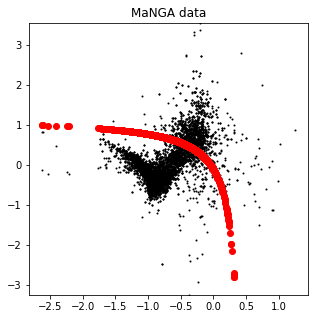

C:\Users\7144\AppData\Local\Temp/ipykernel_24392/3354628550.py:13: RuntimeWarning: divide by zero encountered in true_divide
  soiii_hb = np.log10(soiii[~cri_soiii_nii] / shb[~cri_soiii_nii])
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/3354628550.py:13: RuntimeWarning: invalid value encountered in true_divide
  soiii_hb = np.log10(soiii[~cri_soiii_nii] / shb[~cri_soiii_nii])
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/3354628550.py:13: RuntimeWarning: divide by zero encountered in log10
  soiii_hb = np.log10(soiii[~cri_soiii_nii] / shb[~cri_soiii_nii])
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/3354628550.py:13: RuntimeWarning: invalid value encountered in log10
  soiii_hb = np.log10(soiii[~cri_soiii_nii] / shb[~cri_soiii_nii])
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/3354628550.py:14: RuntimeWarning: divide by zero encountered in true_divide
  snii_ha = np.log10(snii[~cri_soiii_nii] / sha[~cri_soiii_nii])
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/3354628

ValueError: Axis limits cannot be NaN or Inf

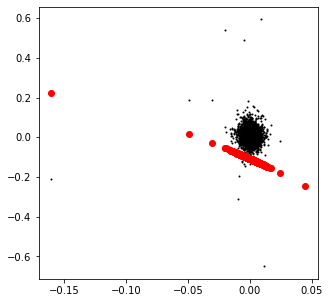

In [66]:
# BPT w. oiii_hb & nii_ha
moiii_hb = np.log10(moiii[~cri_moiii_nii & cri_mon] / mhb[~cri_moiii_nii & cri_mon])
mnii_ha = np.log10(mnii[~cri_moiii_nii & cri_mon] / mha[~cri_moiii_nii & cri_mon])
mline_nii_ha = 0.61 / (mnii_ha[mnii_ha < 0.47] - 0.47) + 1.19

plt.figure(figsize=(5,5))
plt.scatter(mnii_ha, moiii_hb, c='k', s=1)
plt.scatter(mnii_ha[mnii_ha < 0.47], mline_nii_ha, c='r')
plt.ylim(min(moiii_hb), max(moiii_hb))
plt.title('MaNGA data')
plt.show()

soiii_hb = np.log10(soiii[~cri_soiii_nii] / shb[~cri_soiii_nii])
snii_ha = np.log10(snii[~cri_soiii_nii] / sha[~cri_soiii_nii])
sline_nii_ha = 0.61 / (snii_ha[snii_ha < 0.47] - 0.47) + 1.19

plt.figure(figsize=(5,5))
plt.scatter(snii_ha, soiii_hb, c='k', s=1)
plt.scatter(snii_ha[snii_ha < 0.47], sline_nii_ha, c='r')
plt.ylim(min(soiii_hb), max(soiii_hb))
plt.title('SDSS data')
plt.show()

C:\Users\7144\AppData\Local\Temp/ipykernel_24392/1856332357.py:2: RuntimeWarning: invalid value encountered in true_divide
  oiii_hb = np.log10(oiii / hb)
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/1856332357.py:2: RuntimeWarning: invalid value encountered in log10
  oiii_hb = np.log10(oiii / hb)
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/1856332357.py:3: RuntimeWarning: invalid value encountered in true_divide
  sii_ha = (np.log10(sii18 / ha) + np.log10(sii32 / ha)) / 2
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/1856332357.py:3: RuntimeWarning: invalid value encountered in log10
  sii_ha = (np.log10(sii18 / ha) + np.log10(sii32 / ha)) / 2


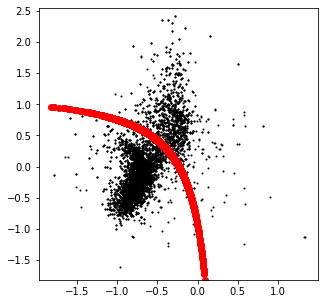

In [22]:
# BPT w. oiii_hb & sii_ha
oiii_hb = np.log10(oiii / hb)
sii_ha = (np.log10(sii18 / ha) + np.log10(sii32 / ha)) / 2
line_sii_ha = 0.72 / (sii_ha[sii_ha < 0.32] - 0.32) + 1.30

plt.figure(figsize=(5,5))
plt.scatter(sii_ha, oiii_hb, c='k', s=1)
plt.scatter(sii_ha[sii_ha < 0.32], line_sii_ha, c='r')
plt.ylim(min(sii_ha), max(sii_ha))
plt.show()

C:\Users\7144\AppData\Local\Temp/ipykernel_24392/4099202654.py:2: RuntimeWarning: invalid value encountered in true_divide
  oiii_hb = np.log10(oiii / hb)
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/4099202654.py:2: RuntimeWarning: invalid value encountered in log10
  oiii_hb = np.log10(oiii / hb)
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/4099202654.py:3: RuntimeWarning: invalid value encountered in true_divide
  sii_ha2 = np.log10(sii18 / ha) + np.log10(sii32 / ha)
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/4099202654.py:3: RuntimeWarning: invalid value encountered in log10
  sii_ha2 = np.log10(sii18 / ha) + np.log10(sii32 / ha)


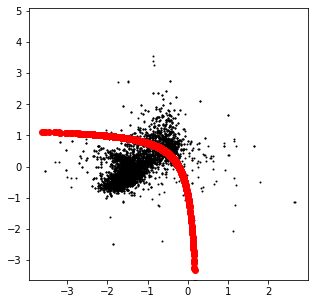

In [23]:
# BPT w. oiii_hb & sii_ha
oiii_hb = np.log10(oiii / hb)
sii_ha2 = np.log10(sii18 / ha) + np.log10(sii32 / ha)
line_sii_ha2 = 0.72 / (sii_ha2[sii_ha2 < 0.32] - 0.32) + 1.30

plt.figure(figsize=(5,5))
plt.scatter(sii_ha2, oiii_hb, c='k', s=1)
plt.scatter(sii_ha2[sii_ha2 < 0.32], line_sii_ha2, c='r')
plt.ylim(min(sii_ha2), max(sii_ha2))
plt.show()

In [33]:
x=np.linspace(-4,-0.591,1000)
def line(x):
    return 0.73/(x+0.59)+1.33

C:\Users\7144\AppData\Local\Temp/ipykernel_24392/769313621.py:2: RuntimeWarning: invalid value encountered in true_divide
  oiii_hb = np.log10(oiii / hb)
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/769313621.py:2: RuntimeWarning: invalid value encountered in log10
  oiii_hb = np.log10(oiii / hb)
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/769313621.py:3: RuntimeWarning: invalid value encountered in true_divide
  oi_ha = np.log10(oi / ha)
C:\Users\7144\AppData\Local\Temp/ipykernel_24392/769313621.py:3: RuntimeWarning: invalid value encountered in log10
  oi_ha = np.log10(oi / ha)


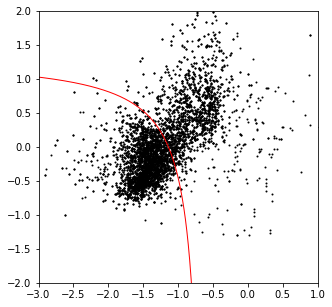

In [35]:
# BPT w. oiii_hb & oi_ha
oiii_hb = np.log10(oiii / hb)
oi_ha = np.log10(oi / ha)
line_oi_ha = 0.73 / (oi_ha[oi_ha < -0.59] + 0.59) + 1.33

plt.figure(figsize=(5,5))
plt.scatter(oi_ha, oiii_hb, c='k', s=1)
# plt.scatter(oi_ha[oi_ha < -0.59], line_oi_ha, c='r')
plt.plot(x, line(x),c='r',lw=1)
plt.ylim(min(oi_ha), max(oi_ha))
plt.ylim(-2,2)
plt.xlim(-3,1)
plt.show()